KNN classification using the five nearest neighbors with california housing dataset

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import scipy.stats as stats

import phik

In [124]:
from sklearn.datasets import fetch_california_housing;
california_housing = fetch_california_housing(as_frame=True);
df=california_housing.frame;
SEED=10;

In [125]:
df['MedHouseValCat']=pd.qcut(df['MedHouseVal'], 4, retbins=False, labels=[1,2,3,4])

2

In [126]:
X=df.drop(['MedHouseVal','MedHouseValCat'], axis=1)
Y=df.MedHouseValCat

3

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=SEED)

4

In [128]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scale.fit(X_train)
X_train=scale.transform(X_train)
X_test = scale.transform(X_test)

In [129]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [130]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_train_pred = knn_model.predict(X_train)
print("Training set accuracy: ",accuracy_score(y_train,y_train_pred)*100)
y_pred = knn_model.predict(X_test)
print("Test set accuracy: ",accuracy_score(y_test,y_pred)*100)

Training set accuracy:  74.4702842377261
Test set accuracy:  63.48837209302326


5

In [131]:
y_pred = knn_model.predict(X_test)
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

Confusion Matrix:
[[1009  231   36    9]
 [ 270  761  243   38]
 [  67  355  644  183]
 [  23  103  326  862]]
Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.79      0.76      1285
           2       0.52      0.58      0.55      1312
           3       0.52      0.52      0.52      1249
           4       0.79      0.66      0.72      1314

    accuracy                           0.63      5160
   macro avg       0.64      0.63      0.64      5160
weighted avg       0.64      0.63      0.64      5160



<AxesSubplot:>

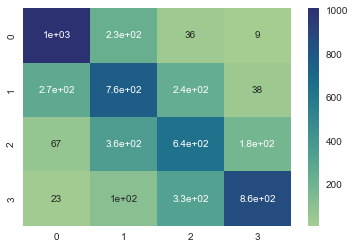

In [132]:
sns.heatmap(result,annot=True,cmap="crest")

6

In [133]:
from sklearn.model_selection import GridSearchCV

parameters = {"n_neighbors": range(1, 50),
            'weights':['uniform', 'distance']}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})

In [134]:
gridsearch.best_params_

{'n_neighbors': 13, 'weights': 'distance'}

In [135]:
best_k = gridsearch.best_params_["n_neighbors"]
best_weights = gridsearch.best_params_["weights"]

In [136]:
knn_model2 = KNeighborsClassifier(n_neighbors=best_k, weights=best_weights)
knn_model.fit(X_train, y_train)
y_train_pred = knn_model.predict(X_train)
#print("Training set accuracy: ",accuracy_score(y_train,y_train_pred))
y_pred = knn_model.predict(X_test)
#print("Test set accuracy: ",accuracy_score(y_test,y_pred))

In [137]:
#MSE
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_pred)

print('train MSE',train_mse)
print('test MSE',test_mse)

train MSE 0.39179586563307495
test MSE 0.5565891472868217


7

In [138]:
#recreating data in step 3
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=SEED)

In [139]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
('scl', StandardScaler()),
('clf', KNeighborsClassifier(n_neighbors=15, weights='uniform'))
])
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=pipeline, X=X_train, y=y_train, cv=10, n_jobs= -1)

print('CV accuracy: %.3f +/− %.3f' % (np.mean(scores),np.std(scores)))

CV accuracy: 0.640 +/− 0.015


8

In [140]:
table=[]
for nn in range(2,20):
    pipeline = Pipeline([
    ('scl', StandardScaler()),
    ('clf', KNeighborsClassifier(n_neighbors=nn, weights='uniform'))
    ])
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(estimator=pipeline, X=X_train, y=y_train, cv=10, n_jobs= -1)
    dic={'Neighbor':nn,
        'acc':np.mean(scores)}
    table.append(dic)
Table=pd.DataFrame(table)
Table

,Neighbor,acc
0,2,0.593346
1,3,0.610142
2,4,0.618734
3,5,0.628424
4,6,0.625646
5,7,0.632300
6,8,0.635594
7,9,0.635465
8,10,0.635853
9,11,0.639147


<AxesSubplot:xlabel='Neighbor'>

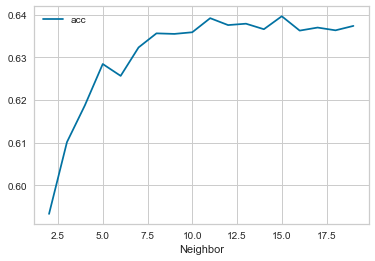

In [141]:
Table.plot(x='Neighbor',y='acc')